# VISUALIZING TECH STOCKS

# Table of Contents
1. [Libraries and FrameWork](#1.-LIBRARIES-AND-FRAMEWORKS)
2. [Data](#2.data)
3. [Analysis](#3.analysis)
    - [Price](##price)
    - [Return](##return)
    - [Dividend](##dividend)
    - [Correlation](##correlation)
    - [Other metrics](##othermetrics)
4. [Conclusion](#4.conclusion)


# 1. LIBRARIES AND FRAMEWORKS

In [4]:
!pip install beautifulsoup4
!pip install pandas 
!pip install pandas-datareader
!pip install yfinance
!pip install matplotlib
!pip install plotly
!pip install numpy

In [12]:
import datetime as dt
import os 
import pandas as pd 
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn  as sns
import pandas_datareader as pdr

# 2. DATA
- [The S&P/ASX All Technology Index (XTX)](https://www2.asx.com.au/markets/trade-our-cash-market/overview/indices/asx-all-technology-index)
|| TOP 10 CONSTITUENTS|BY MARKET CAP AT MARCH 2020|
| ---- | ---- | ---- |
|**1**| [Block,Inc.](https://en.wikipedia.org/wiki/Block,_Inc.)|<img src="https://upload.wikimedia.org/wikipedia/en/3/33/Block%2C_Inc_logo.png" width="80" height="80" />|
|**2**|[REA Group Limited](https://en.wikipedia.org/wiki/REA_Group)|<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/REA_Group_logo.svg/2880px-REA_Group_logo.svg.png' width='150' heigh ='180' />|
|**3**|[WiseTech Global Limited](https://www.globaldata.com/company-profile/wisetech-global-ltd/)| <img src='https://www.wisetechglobal.com/media/tegdefie/wisetech-global-logo.svg' width='150' heigh ='150' /> |
|**4**|[Xero Limited](https://en.wikipedia.org/wiki/Xero_(company)| <img src='https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Xero_software_logo.svg/1200px-Xero_software_logo.svg.png' width='100' heigh='100'/> |
|**5**|[Computershare Limited](https://en.wikipedia.org/wiki/Computershare)|<img src='https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/Computershare_logo.svg/2880px-Computershare_logo.svg.png' width='150' heigh ='150' /> |
|**6**|[SEEK Limited](https://en.wikipedia.org/wiki/Seek_Limited)|<img src='https://upload.wikimedia.org/wikipedia/en/thumb/9/9c/Seek_Limited_logo.svg/1200px-Seek_Limited_logo.svg.png' width='150' heigh ='150' /> |
|**7**|[carsales.com Ltd](https://en.wikipedia.org/wiki/Carsales)|<img src='https://upload.wikimedia.org/wikipedia/en/c/c1/Carsales_logo.png' width='150' heigh ='150' />|
|**8**|[NEXTDC Limited](https://en.wikipedia.org/wiki/NextDC)|<img src='https://upload.wikimedia.org/wikipedia/en/b/b7/NextDC_logo.png' width='150' heigh ='150' /> |
|**9**|[Pro Medicus Limited](http://www.promed.com.au/about/)|<img src='http://www.promed.com.au/wp-content/uploads/2015/02/Retina.png' width='150' heigh ='150' /> |
|**10**|[Altium Limited](https://en.wikipedia.org/wiki/Altium) |<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Altium_Limited_logo.svg/2880px-Altium_Limited_logo.svg.png' width='150' heigh ='150' /> |

In [278]:
#ticker_list
data= [['Block,Inc.', 'SQ'],
        ['REA Group Limited', 'REA.AX' ],
        ['WiseTech Global Limited', 'WTC.AX'],
        ['Xero Limited','XRO.AX'],
        ['Computershare Limited','CPU.AX'],
        ['SEEK Limited','SEK.AX'],
        ['carsales.com Ltd','CAR.AX'],
        ['NEXTDC Limited','NXT.AX'],
        ['Pro Medicus Limited','PME.AX'],
        ['Altium Limited','ALU.AX']]
df = pd.DataFrame(data, columns=['Stock', 'Ticker'])
print(df)  
    
tickers=df['Ticker'].to_list()
print('List of tickers: ',tickers)

                     Stock  Ticker
0               Block,Inc.      SQ
1        REA Group Limited  REA.AX
2  WiseTech Global Limited  WTC.AX
3             Xero Limited  XRO.AX
4    Computershare Limited  CPU.AX
5             SEEK Limited  SEK.AX
6         carsales.com Ltd  CAR.AX
7           NEXTDC Limited  NXT.AX
8      Pro Medicus Limited  PME.AX
9           Altium Limited  ALU.AX
List of tickers:  ['SQ', 'REA.AX', 'WTC.AX', 'XRO.AX', 'CPU.AX', 'SEK.AX', 'CAR.AX', 'NXT.AX', 'PME.AX', 'ALU.AX']


### COMPANIES' INFORMATION

In [50]:
def get_company_info():
#if not os.path.exists('txt_top10_dfs'):
    #os.makedirs('txt_top10_dfs')
    company_metrics={}
    for ticker in tickers:
        company_metrics[ticker]={}
        company_info=yf.Ticker(ticker)
        company_metrics[ticker]['Market Cap']= company_info.info['marketCap']
        company_metrics[ticker]['Enterprise Value']= company_info.info['enterpriseValue']
        company_metrics[ticker]['EV to Revenue']= company_info.info['enterpriseToRevenue']
        company_metrics[ticker]['EV to EBITDA']= company_info.info['enterpriseToEbitda']
        company_metrics[ticker]['% held by insiders']= company_info.info['heldPercentInsiders']
        company_metrics[ticker]['Book Value']= company_info.info['bookValue']
        company_metrics[ticker]['Revenue']= company_info.info['totalRevenue']
        company_metrics[ticker]['Most recent quarter']= company_info.info['mostRecentQuarter']
        company_metrics[ticker]['Net Income to Common']= company_info.info['netIncomeToCommon']
        company_metrics[ticker]['Trailing EPS ']= company_info.info['trailingEps']
        company_metrics[ticker]['Forward PE ']= company_info.info['forwardPE']
        company_metrics[ticker]['Trailing PS ']= company_info.info['priceToSalesTrailing12Months']
        company_metrics[ticker]['Price/Book Value']= company_info.info['priceToBook']
        company_metrics[ticker]['PEG Ratio ']= company_info.info['pegRatio']
        company_metrics[ticker]['Profit Margin']= company_info.info['profitMargins']
        company_metrics[ticker]['Return on Equity']= company_info.info['returnOnEquity']
        company_metrics[ticker]['Free Cash FLow']= company_info.info['freeCashflow']
        company_metrics[ticker]['Total Debt/Equity']= company_info.info['debtToEquity']
        company_metrics[ticker]['Payout ratio']= company_info.info['payoutRatio']
        company_metrics[ticker]['Dividend Yield']= company_info.info['dividendYield']
        company_metrics[ticker]['Current price']= company_info.info['previousClose']
        company_metrics[ticker]['52-week high']= company_info.info['fiftyTwoWeekHigh']
        company_metrics[ticker]['52-week low ']= company_info.info['fiftyTwoWeekLow']
        company_metrics[ticker]['50-day MA ']= company_info.info['fiftyDayAverage']

    df=pd.DataFrame.from_dict(company_metrics)
    if not os.path.exists('financial_metrics.csv'):
        df.to_csv('financial_metrics.csv')
    else:
        os.remove('financial_metrics.csv')
        df.to_csv('financial_metrics.csv')

    print ('Success!')
#get_company_info()

Success!


### CLOSING PRICE 2019-2022

In [27]:
#get data from yahoo!finance
start=dt.datetime(2019,1,1)
end=dt.datetime.now()
def get_data():
    if not os.path.exists('txt_top10_dfs'):
            os.makedirs('txt_top10_dfs')
            
    for ticker in tickers:
        if not os.path.exists('txt_top10_dfs/{}.csv'.format(ticker)):
            df=pdr.get_data_yahoo(ticker,start,end)
            df.to_csv('txt_top10_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
#get_data()

In [26]:
#compile data 
def compile_data():
    main_df=pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df=pd.read_csv('txt_top10_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace=True)
        df.rename(columns={'Adj Close':ticker}, inplace= True)
        df.drop(['High','Low','Open','Close','Volume'],axis=1, inplace=True)
        
        if main_df.empty:
            print('dataframe is empty')
            main_df=df
        else:
            main_df=main_df.join(df,how='outer')
        
    print (main_df.head())
    main_df.to_csv('txt_top10.csv')
#compile_data()

### DIVIDENDS 2019-2022

In [16]:
def get_dividend():
    if not os.path.exists('txt_top10div_dfs'):
            os.makedirs('txt_top10div_dfs')
        
    for ticker in tickers:
        if not os.path.exists('txt_top10div_dfs/{}.csv'.format(ticker)):
            df=pdr.DataReader(ticker,data_source = 'yahoo-dividends',start=start,end=end)
            df.to_csv('txt_top10div_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
#get_dividend()

In [30]:
#compile data 
def compile_div_data():
    main_df=pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df=pd.read_csv('txt_top10div_dfs/{}.csv'.format(ticker))
        df.rename(columns={'Unnamed: 0':'Date'}, inplace= True)
        df.set_index('Date',inplace=True)
        df.rename(columns={'value':ticker}, inplace= True)
        df.drop(['action'],axis=1, inplace=True)
        
        if main_df.empty:
            print('dataframe is empty')
            main_df=df
        else:
            main_df=main_df.join(df,how='outer')
        
    print (main_df.head())
    main_df.to_csv('txt_top10_div.csv')
#compile_div_data()

dataframe is empty
dataframe is empty
            REA.AX  WTC.AX XRO.AX    CPU.AX  SEK.AX  CAR.AX NXT.AX  PME.AX  \
Date                                                                         
2019-02-18     NaN     NaN    NaN  0.207942     NaN     NaN    NaN     NaN   
2019-02-28     NaN     NaN    NaN       NaN     NaN     NaN    NaN     NaN   
2019-03-03    0.55     NaN    NaN       NaN     NaN     NaN    NaN     NaN   
2019-03-06     NaN     NaN    NaN       NaN     NaN     NaN    NaN   0.035   
2019-03-07     NaN   0.015    NaN       NaN     NaN     NaN    NaN     NaN   

            ALU.AX  
Date                
2019-02-18     NaN  
2019-02-28    0.16  
2019-03-03     NaN  
2019-03-06     NaN  
2019-03-07     NaN  


---

# 3. ANALYSIS

In [7]:
metrics_df=pd.read_csv('financial_metrics.csv')
metrics_df.rename(columns={'Unnamed: 0':'Metrics'},inplace=True)
metrics_df.set_index('Metrics',inplace=True)
metrics_df

,SQ,REA.AX,WTC.AX,XRO.AX,CPU.AX,SEK.AX,CAR.AX,NXT.AX,PME.AX,ALU.AX
Metrics,,,,,,,,,,
Market Cap,3.705938e+10,1.466367e+10,1.240767e+10,1.178915e+10,1.490003e+10,7.439398e+09,5.285127e+09,4.895421e+09,4.432600e+09,3.565439e+09
Enterprise Value,3.436608e+10,1.501279e+10,1.123939e+10,1.107515e+10,1.627765e+10,8.318366e+09,6.486163e+09,5.639115e+09,4.023871e+09,3.196359e+09
EV to Revenue,2.075000e+00,1.181500e+01,2.044300e+01,1.009800e+01,6.933000e+00,8.743000e+00,1.379700e+01,2.096700e+01,4.990700e+01,1.578800e+01
EV to EBITDA,2.718790e+02,2.760700e+01,5.440200e+01,1.332880e+02,3.241300e+01,2.215900e+01,2.863200e+01,3.966900e+01,7.650400e+01,5.011100e+01
% held by insiders,6.310000e-03,6.210800e-01,5.295400e-01,1.614200e-01,1.183900e-01,4.598000e-02,7.331000e-02,2.390000e-03,5.617200e-01,1.305800e-01
Book Value,3.004800e+01,9.300000e+00,3.660000e+00,6.917000e+00,3.672000e+00,5.268000e+00,3.339000e+00,3.670000e+00,9.120000e-01,1.982000e+00
Revenue,1.656458e+10,1.270666e+09,5.498000e+08,1.096819e+09,2.347995e+09,9.514000e+08,4.701170e+08,2.689530e+08,8.062700e+07,2.024540e+08
Most recent quarter,1.648685e+09,1.640909e+09,1.640909e+09,1.648685e+09,1.640909e+09,1.640909e+09,1.640909e+09,1.640909e+09,1.640909e+09,1.640909e+09
Net Income to Common,-7.692300e+07,3.705770e+08,1.411000e+08,-9.114000e+06,2.084780e+08,1.815000e+08,1.442520e+08,7.424000e+06,3.798500e+07,4.152800e+07


In [5]:
txt10_df=pd.read_csv('txt_top10.csv')
txt10_df.set_index('Date', inplace=True)
txt10_df

,SQ,REA.AX,WTC.AX,XRO.AX,CPU.AX,SEK.AX,CAR.AX,NXT.AX,PME.AX,ALU.AX
Date,,,,,,,,,,
2018-12-31,56.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,71.515320,16.933731,41.950001,15.417190,15.564867,9.803983,6.08,11.212163,20.729252
2019-01-02,57.200001,71.929428,17.102770,42.090000,15.417190,15.829964,9.967687,6.06,11.733888,20.758026
2019-01-03,52.419998,69.714439,16.376892,40.900002,15.081637,15.508060,9.813077,5.89,11.418883,19.942671
2019-01-04,58.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-09,76.580002,105.000000,39.599998,79.720001,23.510000,22.330000,19.209999,10.82,41.310001,27.020000
2022-06-10,71.870003,105.400002,38.990002,82.930000,23.170000,22.230000,19.120001,10.63,41.380001,27.080000
2022-06-13,62.759998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
div_df=pd.read_csv('txt_top10_div.csv')
div_df

,Date,REA.AX,WTC.AX,XRO.AX,CPU.AX,SEK.AX,CAR.AX,NXT.AX,PME.AX,ALU.AX
0,2019-02-18,NaN,NaN,NaN,0.207942,NaN,NaN,NaN,NaN,NaN
1,2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16
2,2019-03-03,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035,NaN
4,2019-03-07,NaN,0.0150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,NaN
6,2019-03-18,NaN,NaN,NaN,NaN,NaN,0.201699,NaN,NaN,NaN
7,2019-03-24,NaN,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN
8,2019-08-20,NaN,NaN,NaN,0.227746,NaN,NaN,NaN,NaN,NaN
9,2019-08-29,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
print (txt10_df.describe())
print (txt10_df.index)
print (txt10_df.columns)

               SQ      REA.AX      WTC.AX      XRO.AX      CPU.AX      SEK.AX  \
count  871.000000  874.000000  874.000000  874.000000  874.000000  874.000000   
mean   137.269012  119.696156   31.501156   98.237563   15.736782   24.066783   
std     73.799071   29.611046   11.209480   33.097123    3.450142    5.498014   
min     38.090000   63.779617   10.445162   40.020000    8.118416   11.586709   
25%     71.439999   98.491364   23.120398   68.455000   13.618906   20.052377   
50%    109.000000  111.603218   28.730043   92.274998   15.408491   22.426825   
75%    214.884995  147.941017   35.624385  131.829994   16.547693   29.083201   
max    281.809998  175.812653   60.162098  155.750000   25.750000   35.473717   

           CAR.AX      NXT.AX      PME.AX      ALU.AX  
count  874.000000  874.000000  874.000000  874.000000  
mean    17.591932    9.727140   34.927106   32.743328  
std      4.117097    2.501203   14.120285    4.241475  
min      9.803983    5.890000   11.212163   19

---

## <u>3A. PRICE<u>

### ***Ranking: Mean Closing Price, Variance, Standard Deviation***

In [136]:
def price_ranking():
    a=txt10_df.mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'index': 'Mean'})
    b=metrics_df.iloc[23:24].transpose().sort_values(by=['50-day MA '],ascending=False).reset_index().rename(columns={'index': '50-day MA'})
    c=txt10_df.var().sort_values(ascending=False).to_frame().reset_index().rename(columns={'index': 'Var'})
    d=txt10_df.std().sort_values(ascending=False).to_frame().reset_index().rename(columns={'index': 'Std.Dev'})
    ranking = pd.concat([a.iloc[:,0:1], b.iloc[:,0:1], c.iloc[:,0:1], d.iloc[:,0:1]], axis=1)
    print (ranking)
    
price_ranking()

     Mean 50-day MA     Var Std.Dev
0      SQ    REA.AX      SQ      SQ
1  REA.AX    XRO.AX  XRO.AX  XRO.AX
2  XRO.AX        SQ  REA.AX  REA.AX
3  PME.AX    PME.AX  PME.AX  PME.AX
4  ALU.AX    WTC.AX  WTC.AX  WTC.AX
5  WTC.AX    ALU.AX  SEK.AX  SEK.AX
6  SEK.AX    SEK.AX  ALU.AX  ALU.AX
7  CAR.AX    CPU.AX  CAR.AX  CAR.AX
8  CPU.AX    CAR.AX  CPU.AX  CPU.AX
9  NXT.AX    NXT.AX  NXT.AX  NXT.AX


### ***Ranking: P/E, P/S, P/B, PEG***

In [203]:
def ratios_ranking():
    a=metrics_df.iloc[10:11,].transpose().sort_values(by=['Forward PE '],ascending=False).reset_index().rename(columns={'index': "Forward PE"})
    b=metrics_df.iloc[11:12,].transpose().sort_values(by=['Trailing PS ' ],ascending=False).reset_index().rename(columns={'index': "PS"})
    c=metrics_df.iloc[12:13,].transpose().sort_values(by=['Price/Book Value' ],ascending=False).reset_index().rename(columns={'index': "PB"})
    d=metrics_df.iloc[13:14,].transpose().sort_values(by=['PEG Ratio ' ],ascending=False).reset_index().rename(columns={'index': "PEG"})
    ranking = pd.concat([a.iloc[:,0:1], b.iloc[:,0:1], c.iloc[:,0:1], d.iloc[:,0:1]], axis=1)
    print (ranking)
ratios_ranking()

Metrics Forward PE      PS      PB     PEG
0           NXT.AX  PME.AX  PME.AX  NXT.AX
1           XRO.AX  WTC.AX  ALU.AX      SQ
2           PME.AX  NXT.AX  REA.AX  XRO.AX
3           WTC.AX  ALU.AX  XRO.AX  PME.AX
4           ALU.AX  REA.AX  WTC.AX  ALU.AX
5               SQ  CAR.AX  CPU.AX  WTC.AX
6           REA.AX  XRO.AX  CAR.AX  CAR.AX
7           SEK.AX  SEK.AX  SEK.AX  REA.AX
8           CAR.AX  CPU.AX  NXT.AX  SEK.AX
9           CPU.AX      SQ      SQ  CPU.AX


### <u>VISUALIZATION<u>

In [10]:
colors=['blue', 'orange','green','red', 'purple', 'brown', 'pink','grey', 'olive','cyan']

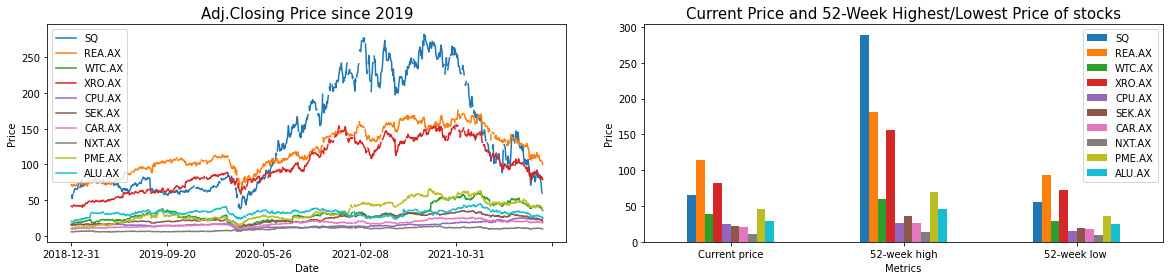

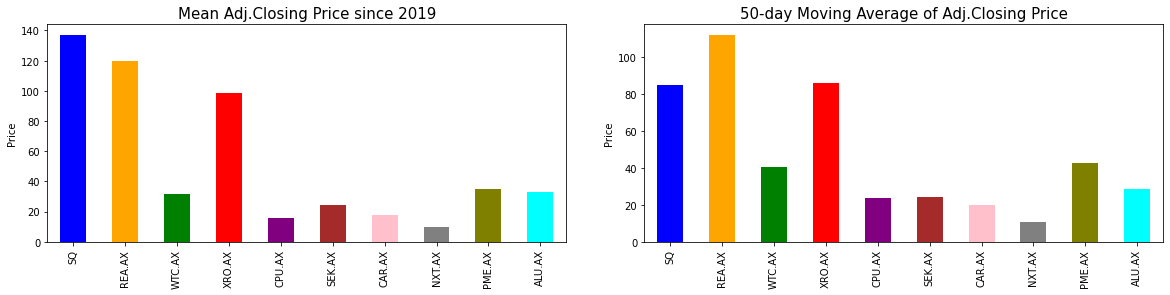

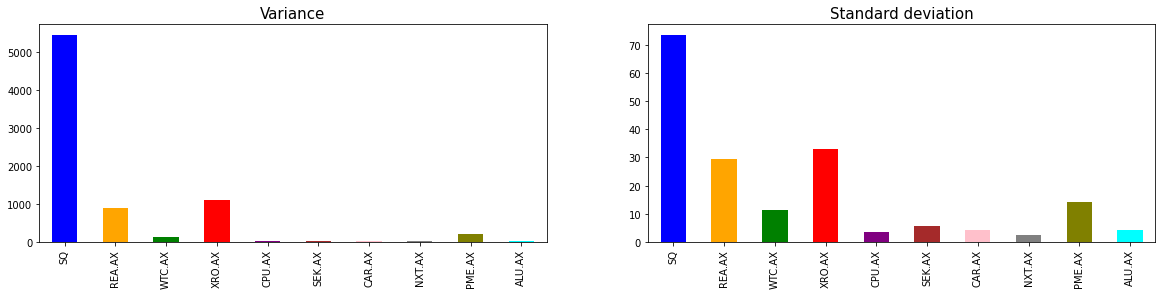

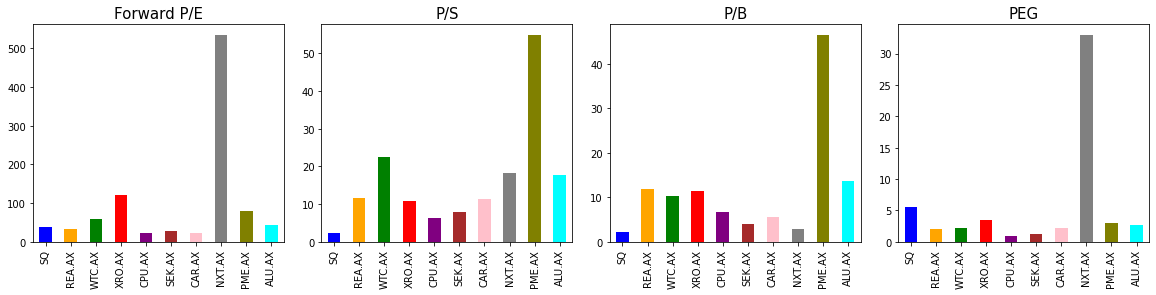

In [234]:
#plot adj.close price over time for all stocks

def fig1():
    fig1 = plt.figure(figsize=(20,4))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    #adj closing since 2019
    txt10_df.plot(kind='line', ax=ax1)
    ax1.set_title("Adj.Closing Price since 2019", fontsize=15)
    ax1.set_xlabel("Date", fontsize=10)
    ax1.set_ylabel("Price", fontsize=10)
    
    #current, 52-week high/low
    metrics_df.iloc[20:23,].plot(kind='bar', ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0)
    ax2.set_xlabel('Metrics',fontsize=10)
    ax2.set_ylabel('Price', fontsize=10)
    ax2.set_title('Current Price and 52-Week Highest/Lowest Price of stocks', fontsize=15)
    
    plt.subplots_adjust(wspace=0.15)
    plt.show()
fig1()

def fig2():
    fig = plt.figure(figsize=(20,4))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    # mean closing price
    txt10_df.mean().plot(kind='bar',ax=ax1,color=colors)
    ax1.set_title('Mean Adj.Closing Price since 2019',fontsize=15)
    ax1.set_ylabel("Price", fontsize=10)
 
    # moving average of closing price 
    metrics_df.iloc[23:24].transpose().squeeze().plot(kind='bar', ax=ax2, color=colors)
    ax2.set_title('50-day Moving Average of Adj.Closing Price', fontsize =15)
    ax2.set_ylabel('Price', fontsize=10)
    
    plt.subplots_adjust(wspace=0.15)
    plt.show()

fig2()

def fig3():
    fig = plt.figure(figsize=(20,4))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    #variance 
    txt10_df.var().plot(kind='bar',ax=ax1,color=colors)
    ax1.set_title('Variance',fontsize=15)


    #standard_deviaton 
    txt10_df.std().plot(kind='bar',ax=ax2,color=colors)
    ax2.set_title('Standard deviation',fontsize=15)
    
fig3()

def fig4():
    fig = plt.figure(figsize=(20,4))
    ax1 = plt.subplot(1, 4, 1)
    ax2 = plt.subplot(1, 4, 2)
    ax3 = plt.subplot(1, 4, 3)
    ax4 = plt.subplot(1, 4, 4)

    #PE
    metrics_df.iloc[10:11,].transpose().squeeze().plot(kind='bar', ax=ax1,color=colors)
    ax1.set_title('Forward P/E', fontsize=15)

    #PS
    metrics_df.iloc[11:12,].transpose().squeeze().plot(kind='bar', ax=ax2,color=colors)
    ax2.set_title('P/S', fontsize=15)

    #PB
    metrics_df.iloc[12:13,].transpose().squeeze().plot(kind='bar', ax=ax3,color=colors)
    ax3.set_title('P/B', fontsize=15)

    #PEG 
    metrics_df.iloc[13:14,].transpose().squeeze().plot(kind='bar', ax=ax4,color=colors)
    ax4.set_title('PEG', fontsize=15)

    plt.subplots_adjust(wspace=0.15)
    plt.show()

fig4()

### ***Personal opinions:***

*Stocks priced 50AUD and over:*
- `SQ` price are among the highest. It's P/E, P/S, PB, PEG are relatively low compare to the others. However, the variance and standard deviation of it's closing price since 2017-2020 are dramatically high. This **won't be a suitable choice for risk-averse investors**. 
- I would **prioritize `REA.AX` over `XRO.AX`** as it has relatively lower variance and standard deviation. Moreover, though their P/S and P/B ratio are relatively similar, `XRO.AX`'s P/E and PEG are higher than those of `REX.AX`

*Stocks priced below 50AUD:*
- `PME.AX` and `NXT.AX` have significantly high PE, PS, PB, PEG ratios compare to other stocks. Therefore, I don't see PME.AX and NXT.AX as a prospective investment as there is a high chance that they are **overvalued**. 
- At the similar price range, `WTC.AX` however has considerably higher Var, Std.Dev, P/E, P/S, P/B, PEG compare to `CPU.AX`, `SEK.AX`, `CAR.AX`, `ALU.AX`


#### My **prioritization** so far:
   1. `REA.AX`
   2. `CPU.AX`, `SEK.AX`, `CAR.AX`, `ALU.AX`


---

## <u>3B. RETURN<u>

### ***Daily simple Rate of Return***

In [170]:
daily_return = txt10_df.pct_change()

### <u>VISUALIZATION<u> 

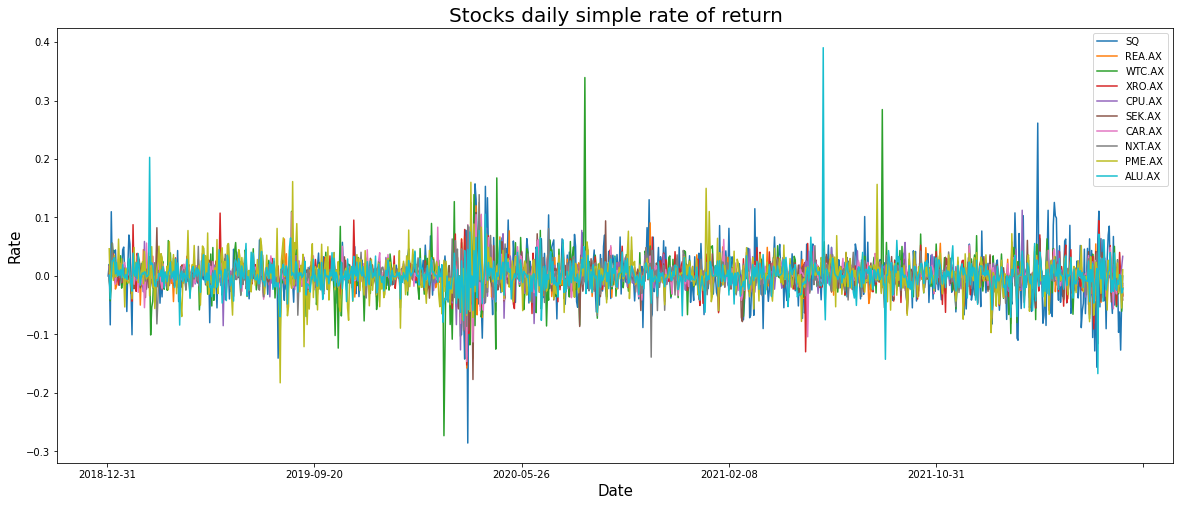

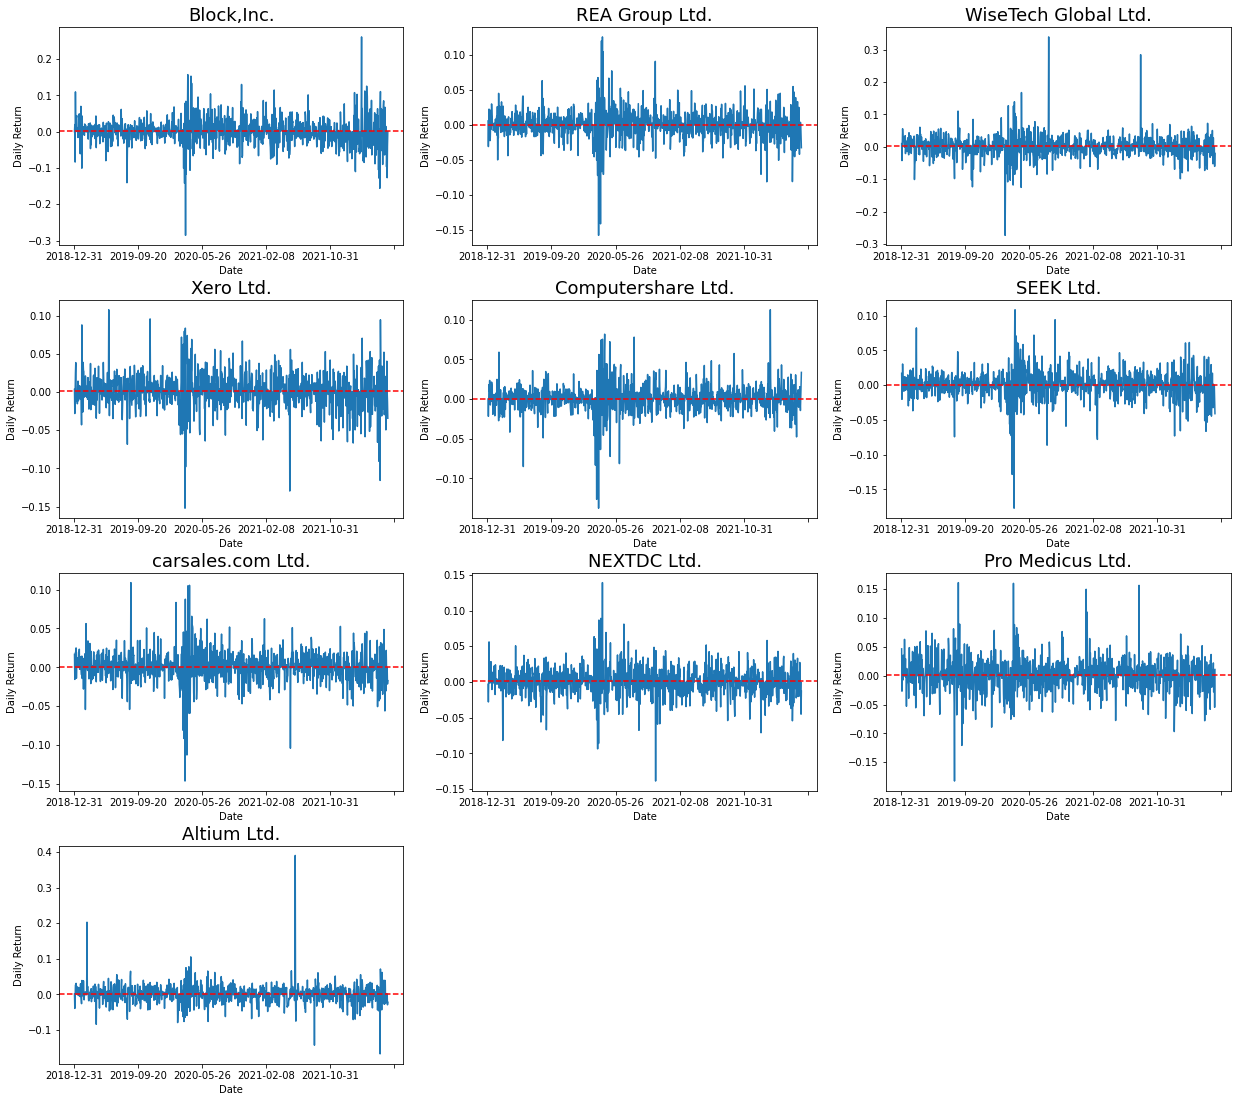

In [157]:
#plot daily simple rate of return 
def fig5():
    daily_return.plot(figsize=(20,8))
    plt.title('Stocks daily simple rate of return',fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Rate', fontsize= 15)
    plt.show()
fig5()


#Create subplots of daily simple rate of return of each stocks
def fig6():
    fig = plt.figure(figsize=(21,8))
    ax1 = plt.subplot(4, 3, 1)
    ax2 = plt.subplot(4, 3, 2)
    ax3 = plt.subplot(4, 3, 3)
    ax4 = plt.subplot(4, 3, 4)
    ax5 = plt.subplot(4, 3, 5)
    ax6 = plt.subplot(4, 3, 6)
    ax7 = plt.subplot(4, 3, 7)
    ax8 = plt.subplot(4, 3, 8)
    ax9 = plt.subplot(4, 3, 9)
    ax10 = plt.subplot(4, 3, 10)

    #SQ
    daily_return['SQ'].plot(ax=ax1)
    ax1.set_title('Block,Inc.',fontsize=18)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Return')
    ax1.axhline(y =daily_return['SQ'].mean(), color = 'r', linestyle = '--')

    #REA
    daily_return['REA.AX'].plot(ax=ax2)
    ax2.set_title('REA Group Ltd.',fontsize=18)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Return')
    ax2.axhline(y =daily_return['REA.AX'].mean(), color = 'r', linestyle = '--')


    #WTC
    daily_return['WTC.AX'].plot(ax=ax3)
    ax3.set_title('WiseTech Global Ltd.',fontsize=18)
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Daily Return')
    ax3.axhline(y =daily_return['WTC.AX'].mean(), color = 'r', linestyle = '--')


    #XRO
    daily_return['XRO.AX'].plot(ax=ax4)
    ax4.set_title('Xero Ltd.',fontsize=18)
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Daily Return')
    ax4.axhline(y =daily_return['XRO.AX'].mean(), color = 'r', linestyle = '--')

    #CPU
    daily_return['CPU.AX'].plot(ax=ax5)
    ax5.set_title('Computershare Ltd.',fontsize=18)
    ax5.set_xlabel('Date')
    ax5.set_ylabel('Daily Return')
    ax5.axhline(y =daily_return['CPU.AX'].mean(), color = 'r', linestyle = '--')

    #SEK
    daily_return['SEK.AX'].plot(ax=ax6)
    ax6.set_title('SEEK Ltd.',fontsize=18)
    ax6.set_xlabel('Date')
    ax6.set_ylabel('Daily Return')
    ax6.axhline(y =daily_return['SEK.AX'].mean(), color = 'r', linestyle = '--')

    #CAR 
    daily_return['CAR.AX'].plot(ax=ax7)
    ax7.set_title('carsales.com Ltd.',fontsize=18)
    ax7.set_xlabel('Date')
    ax7.set_ylabel('Daily Return')
    ax7.axhline(y =daily_return['CAR.AX'].mean(), color = 'r', linestyle = '--')

    #NXT 
    daily_return['NXT.AX'].plot(ax=ax8)
    ax8.set_title('NEXTDC Ltd.',fontsize=18)
    ax8.set_xlabel('Date')
    ax8.set_ylabel('Daily Return')
    ax8.axhline(y =daily_return['NXT.AX'].mean(), color = 'r', linestyle = '--')

    #PME 
    daily_return['PME.AX'].plot(ax=ax9)
    ax9.set_title('Pro Medicus Ltd.',fontsize=18)
    ax9.set_xlabel('Date')
    ax9.set_ylabel('Daily Return')
    ax9.axhline(y =daily_return['PME.AX'].mean(), color = 'r', linestyle = '--')

    #ALU
    daily_return['ALU.AX'].plot(ax=ax10)
    ax10.set_title('Altium Ltd.',fontsize=18)
    ax10.set_xlabel('Date')
    ax10.set_ylabel('Daily Return')
    ax10.axhline(y =daily_return['ALU.AX'].mean(), color = 'r', linestyle = '--')


    plt.subplots_adjust(wspace=0.2, top=2, bottom= 0.2, hspace=0.25)

    plt.show()
    
fig6()
    

### ***Ranking: ROE, Mean Daily Return, Variance and Std.Dev of daily return***

In [160]:
def return_ranking():
    a=metrics_df.iloc[15:16,].transpose().sort_values(by=['Return on Equity' ],ascending=False).reset_index().rename(columns={'index': 'ROE'})
    b=daily_return.mean().sort_values(ascending=False).reset_index().rename(columns={'index': 'Mean'})
    c=daily_return.var().sort_values(ascending=False).reset_index().rename(columns={'index': 'Var'})
    d=daily_return.std().sort_values(ascending=False).reset_index().rename(columns={'index': 'Std.Dev'})
    ranking = pd.concat([a.iloc[:,0:1], b.iloc[:,0:1], c.iloc[:,0:1], d.iloc[:,0:1]], axis=1)
    print (ranking)
    
return_ranking()

      ROE    Mean     Var Std.Dev
0  PME.AX  PME.AX      SQ      SQ
1  REA.AX  WTC.AX  WTC.AX  WTC.AX
2  CAR.AX  XRO.AX  PME.AX  PME.AX
3  ALU.AX  CAR.AX  ALU.AX  ALU.AX
4  WTC.AX      SQ  XRO.AX  XRO.AX
5  CPU.AX  NXT.AX  REA.AX  REA.AX
6  SEK.AX  CPU.AX  SEK.AX  SEK.AX
7  NXT.AX  REA.AX  NXT.AX  NXT.AX
8      SQ  ALU.AX  CAR.AX  CAR.AX
9  XRO.AX  SEK.AX  CPU.AX  CPU.AX


### <u>VISUALIZATION<u>

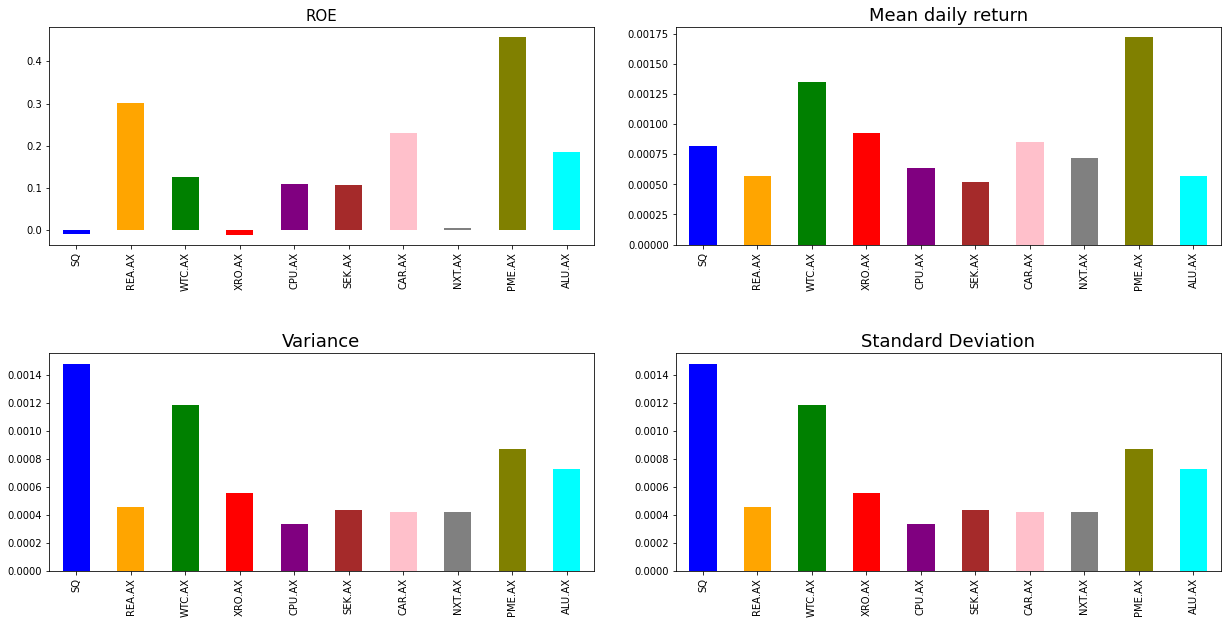

In [255]:
def fig7():
    fig = plt.figure(figsize=(21,10))
    ax1 = plt.subplot(2, 2, 1)
    ax2 = plt.subplot(2, 2, 2)
    ax3 = plt.subplot(2, 2, 3)
    ax4 = plt.subplot(2, 2, 4)
    
    #ROE
    metrics_df.iloc[15:16,].transpose().squeeze().plot(kind='bar', ax=ax1, color=colors)
    ax1.set_title('ROE', fontsize=15)
    #ax1.set_xlabel('')
    
    #Mean daily return
    daily_return.mean().plot(kind='bar',ax=ax2,color=colors)
    ax2.set_title('Mean daily return',fontsize=18)
    
    #Variance 
    daily_return.var().plot(kind='bar',ax=ax3,color=colors)
    ax3.set_title('Variance',fontsize=18)
    #ax3.set_xlabel('')
    
    #Std.dev
    daily_return.var().plot(kind='bar',ax=ax4,color=colors)
    ax4.set_title('Standard Deviation',fontsize=18)

    plt.subplots_adjust(wspace=0.15, hspace=0.5)

    plt.show()
    
fig7()

### ***Personal opinions:***

- I see myself as a risk aversion inverstor, therefore, I'm looking for stock with little volatile 
    - `REA.AX` ranked 2nd among highest ROE, while having moderate varaince and standard devidation. 
    - `CAR.AX` has the 3rd highest ROE, 4th highest mean daily return, 2nd lowest var and std.dev 
    - `CPU.AX`: moderate ROE, below median of all stocks' avereage daily return but has lowest var and std. 
    - `ALU.AX`: the 4th highest ROE, 2nd lowest daily return, the 4th highest var and std 
    - `SEK.AX`: low ROE, the lowest mean daily return, moderate var, std.dev

#### My **prioritization** so far:
1. `REA.AX`
2. `CAR.AX`
3. `CPU.AX`
4. `SEK.AX`
5. `ALU.AX`

---

## <u>3C. DIVIDEND<u>

### ***Ranking: Times each company had paid dividend (2019-2022)***

In [283]:
div_df.set_index('Date', inplace=True)

In [306]:
div_df.count().sort_values(ascending=False).reset_index()

,index,0
0,PME.AX,8
1,REA.AX,7
2,WTC.AX,7
3,CPU.AX,7
4,CAR.AX,7
5,ALU.AX,7
6,SEK.AX,6
7,XRO.AX,0
8,NXT.AX,0


### ***Ranking: Payout ratio and Dividend Yield***

In [167]:
def dividend_ranking():
    a=metrics_df.iloc[18:19].transpose().squeeze().sort_values(ascending=False).reset_index().rename(columns={'index': 'Payout'})
    b=metrics_df.iloc[19:20].transpose().squeeze().sort_values(ascending=False).reset_index().rename(columns={'index': 'Div. Yield'})
    ranking = pd.concat([a.iloc[:,0:1], b.iloc[:,0:1]], axis=1)
    print (ranking)
    
dividend_ranking()

   Payout Div. Yield
0  CPU.AX     CAR.AX
1  ALU.AX     SEK.AX
2  CAR.AX     CPU.AX
3  SEK.AX     ALU.AX
4  REA.AX     REA.AX
5  PME.AX     PME.AX
6  WTC.AX     WTC.AX
7      SQ         SQ
8  XRO.AX     XRO.AX
9  NXT.AX     NXT.AX


### <u>VISUALIZATION<u>

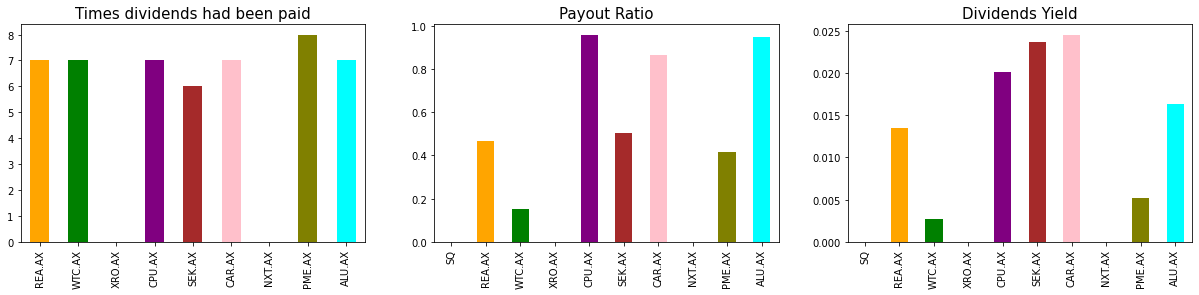

In [285]:
def fig8():
    fig = plt.figure(figsize=(21,4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)

    #number of times dividends had been paid
    div_df.count().plot(kind='bar',ax=ax1, color= colors[1:11])
    ax1.set_title('Times dividends had been paid', fontsize=15)
    
    #payout ratio  
    metrics_df.iloc[18:19].transpose().squeeze().plot(kind='bar', ax=ax2,color=colors)
    ax2.set_title('Payout Ratio', fontsize=15)
    
    #dividends yield
    metrics_df.iloc[19:20].transpose().squeeze().plot(kind='bar', ax=ax3,color=colors)
    ax3.set_title('Dividends Yield', fontsize=15)
    
    plt.show()
fig8()


### ***Personal opinions:***

- Not all tech stocks pay dividends as companies re-invest the cashback into expanding operations. Therefore, **dividend is not a factor that would strongly influence** my investment decision. 
    - [Why some tech companies don't pay dividends](https://www.spaceship.com.au/learn/why-some-tech-companies-dont-pay-dividends/)
    - [Companies That Pay Dividends—And Those That Don't](https://www.investopedia.com/ask/answers/12/why-do-some-companies-pay-a-dividend.asp)
- `SQ`, `XRO.AX`, `NXT.AX` do not pay dividend

- `CAR.AX` has paid dividends 7 times since 2019. This would be a good option for investors expecting dividend as a source of income since the company's payout ratio is relatively high and their dividend yield is the highest among all. However, high payout ratio means less room for further company's growth
- `CPU.AX`, `ALU.AX` also have significantly high payout ratio. 

- Myself would prefer companies with moderate payout ratio. 
    - `SEK.AX` has paid dividends 6 times since 2019. The payout ratio is 50.3%. Their dividend yield is the second highest. 
    - `REA.AX` has paid dividends 7 times since 2019. The payout ratio is 46.7%. Their dividend yield ranked 5th
    
    
#### My **prioritization** so far:
1. `REA.AX`
2. `SEK.AX`
3. `CAR.AX`
4. `CPU.AX`
5. `ALU.AX`


---

## <u>3D. CORRELATION<u>

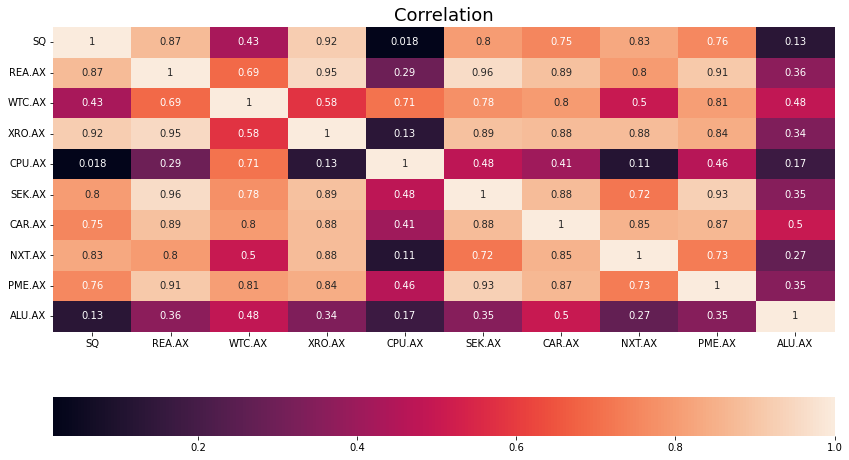

In [277]:
fig = plt.figure(figsize=(14,8))
fig = sns.heatmap(txt10_df.corr(),cbar_kws={"orientation": "horizontal"},annot=True)
plt.title('Correlation', fontsize=18)
plt.show()

### ***Personal opinions:***
- None of the stocks are negatively correlated. 
    - `REA.AX` and `SEK.AX` have the highes correlation
    - `SQ` and `CPU` have the lowest correlation

- To diversify the risk, it would be a good option to invest in two stocks with low correlation
    - `REA.AX` and `CPU.AX` (0.29) 
    - `REA.AX` and `ALU.AX`(0.36)
    - `ALU.AX` and `CPU.AX`(0.17)
    - `CAR.AX` and `CPU.AX`(0.41)
    - `CAR.AX` and `ALU.AX`(0.5)

#### My **prioritization** so far:
1. `REA.AX`
2. `CPU.AX`
3. `SEK.AX`
4. `CAR.AX`
5. `ALU.AX`

---

## <u>3E. OTHER METRICS<u>

In [8]:
other_metrics=pd.concat([metrics_df.iloc[0:7].transpose().squeeze(),
                         metrics_df.iloc[14:15].transpose().squeeze(),
                         metrics_df.iloc[16:17].transpose().squeeze()], axis=1)
other_metrics

,Market Cap,Enterprise Value,EV to Revenue,EV to EBITDA,% held by insiders,Book Value,Revenue,Profit Margin,Free Cash FLow
SQ,3.705938e+10,3.436608e+10,2.075,271.879,0.00631,30.048,1.656458e+10,-0.00464,9.616462e+07
REA.AX,1.466367e+10,1.501279e+10,11.815,27.607,0.62108,9.300,1.270666e+09,0.29164,3.040491e+08
WTC.AX,1.240767e+10,1.123939e+10,20.443,54.402,0.52954,3.660,5.498000e+08,0.25664,1.241500e+08
XRO.AX,1.178915e+10,1.107515e+10,10.098,133.288,0.16142,6.917,1.096819e+09,-0.00831,3.098600e+07
CPU.AX,1.490003e+10,1.627765e+10,6.933,32.413,0.11839,3.672,2.347995e+09,0.08879,2.321683e+08
SEK.AX,7.439398e+09,8.318366e+09,8.743,22.159,0.04598,5.268,9.514000e+08,0.79504,-1.594513e+09
CAR.AX,5.285127e+09,6.486163e+09,13.797,28.632,0.07331,3.339,4.701170e+08,0.30684,1.522254e+08
NXT.AX,4.895421e+09,5.639115e+09,20.967,39.669,0.00239,3.670,2.689530e+08,0.02760,-2.818686e+08
PME.AX,4.432600e+09,4.023871e+09,49.907,76.504,0.56172,0.912,8.062700e+07,0.47112,3.208250e+07
ALU.AX,3.565439e+09,3.196359e+09,15.788,50.111,0.13058,1.982,2.024540e+08,0.54336,7.727062e+07


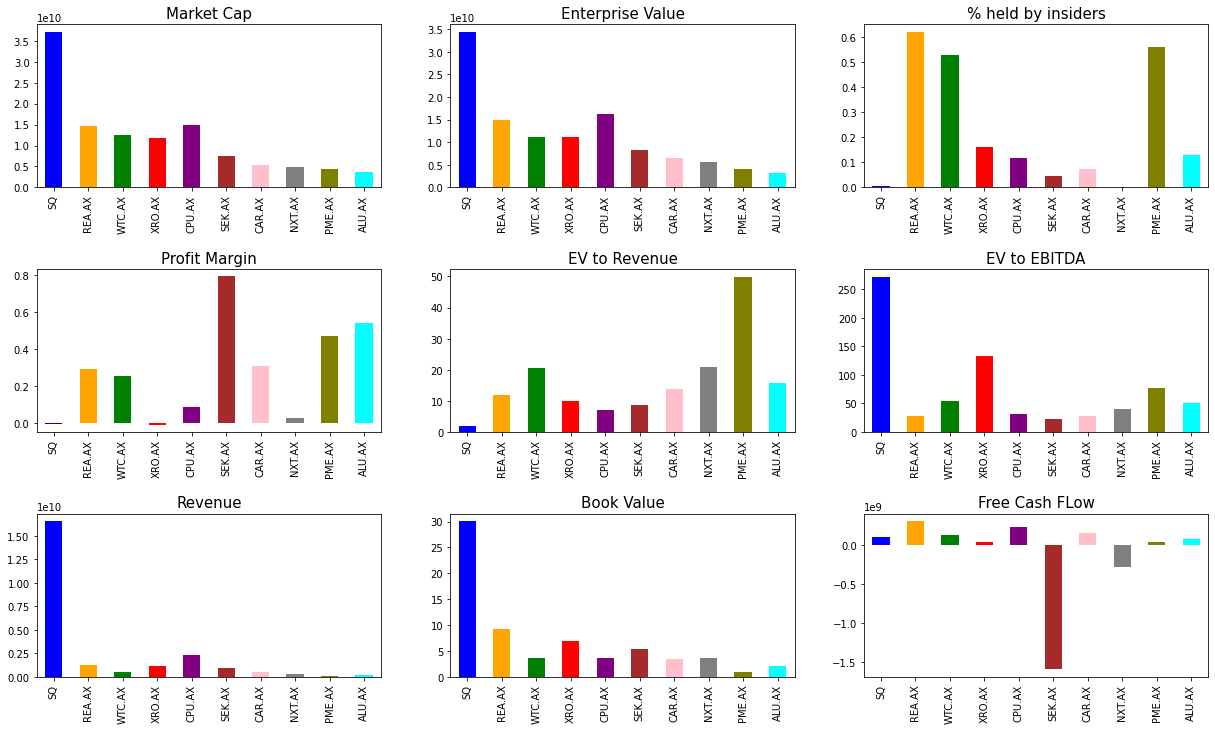

In [11]:
def fig10():
    fig = plt.figure(figsize=(21,12))
    ax1 = plt.subplot(3, 3, 1)
    ax2 = plt.subplot(3, 3, 2)
    ax3 = plt.subplot(3, 3, 3)
    ax4 = plt.subplot(3, 3, 4)
    ax5 = plt.subplot(3, 3, 5)
    ax6 = plt.subplot(3, 3, 6)
    ax7 = plt.subplot(3, 3, 7)
    ax8 = plt.subplot(3, 3, 8)
    ax9 = plt.subplot(3, 3, 9)
    
    #marketcap
    other_metrics.loc[:,'Market Cap'].plot(kind='bar', ax=ax1, color=colors)
    ax1.set_title('Market Cap', fontsize=15)
  
    #enterprise value
    other_metrics.loc[:,'Enterprise Value'].plot(kind='bar', ax=ax2, color=colors)
    ax2.set_title('Enterprise Value',fontsize=15)
    
    #held by insiders
    other_metrics.loc[:,'% held by insiders'].plot(kind='bar', ax=ax3, color=colors)
    ax3.set_title('% held by insiders',fontsize=15)
    
    #profit margin
    other_metrics.loc[:,'Profit Margin'].plot(kind='bar', ax=ax4, color=colors)
    ax4.set_title('Profit Margin',fontsize=15)
    
    #ev to rev 
    other_metrics.loc[:,'EV to Revenue'].plot(kind='bar', ax=ax5, color=colors)
    ax5.set_title('EV to Revenue',fontsize=15)

    
    #ev to ebitda
    other_metrics.loc[:,'EV to EBITDA'].plot(kind='bar', ax=ax6, color=colors)
    ax6.set_title('EV to EBITDA',fontsize=15)
        

    #revenue 
    other_metrics.loc[:,'Revenue'].plot(kind='bar', ax=ax7, color=colors)
    ax7.set_title('Revenue',fontsize=15)   
        
    #book value 
    other_metrics.loc[:,'Book Value'].plot(kind='bar', ax=ax8, color=colors)
    ax8.set_title('Book Value',fontsize=15)   
    
    #fcf 
    other_metrics.loc[:,'Free Cash FLow'].plot(kind='bar', ax=ax9, color=colors)
    ax9.set_title('Free Cash FLow',fontsize=15)   


    plt.subplots_adjust(wspace=0.2, hspace=0.5)

fig10()

- I would prefer not to touch `SEK.AX` as report shows the company is having a large negative amount of FCF. This may indicates the inability to generate enough cash to support business.  
- The other metrics are for reference purposes, aim to provide more insights for readers. 

#### My **prioritization** so far:
1. `REA.AX`
2. `CPU.AX`
4. `CAR.AX`
5. `ALU.AX`

---

# 4. CONCLUSION

- The Price analysis shows that `SQ`, `REA.AX`, `XRO.AX` are three stocks that price above 50AUD and bear substantially higer risks than those priced below 50AUD. This align with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.


- `SQ`, `NXT.AX` and `PME.AX` are not suitale for risk-aversion investors as: 
    - `SQ` has a significantly high price variance, standarad deviation
    - `NXT.AX` has highest P/E, PEG ratios 
    - `PME.AX` has highest P/S, P/B ratios 
    
- `WTC.AX` has higher Var, Std.Dev, P/E, P/S, P/B, PEG compared to other stockes within the similar price range (below 50AUD). Moreover, look into the ratios from it's return analysis: the ROE is modest, however, it's daily return var and std.dev are high. Altogether, if I happen to invest in any stock that price **below 50AUD**, `WTX.AX` won't be my choice (the others left are `CPU.AX`, `SEK.AX`, `CAR.AX`, `ALU.AX`)

- `REA.AX` seems a good option since it exposes to lower risk and has decent ratios compared to others in this price range. `XRO.AX` ratios are just slightly above those of `REA.AX`, but it's ROE is substantially lower than `REA.AX`'s. Thus, among the stocks with the current price **above 50AUD**, `REA.AX` is my prioritization. 

- `SEK.AX` won't be in my list as it's Free Cash FLow is negative. 



- `REA.AX`, `CPU.AX`, `CAR.AX`, `ALU.AX` 's return and dividend indicators look reasonable. 


- If investors wish to diversify the portfolio: 
    - `REA.AX` vs `CPU.AX`
    - `REA.AX` vs `ALU.AX` 
    - `ALU.AX` vs `CPU.AX` (more on budget as stocks are below 50AUD each)


---